# Library

In [1]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import ElasticNetCV

# model_selection
from sklearn.model_selection import GridSearchCV

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Cours/Projet 10/Projet/billets.csv', delimiter =(';'))

# Vérification des données

In [3]:
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
# vérifier si des doublons sont présents
data.duplicated().sum()

0

Aucun doublon n'est présent

In [5]:
# vérifier si des colonnes ne contiendraient qu'une valeur et que 'is_genuine' ne contient bien que deux valeurs
data.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [6]:
# recherches de données manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


37 données dans la colonnes 'margin_low' sont absentes. Nous pouvons, pour déterminer quel modèle utilisé pour les compléter, réaliser des observations graphiques

# Matrice de correlation des variables et observations graphiques.

Avant de chercher à compléter les données nous allons observer les correlations entre les variables afin de comprendre les relations entre elles.

Observation par la matrice des correlations.

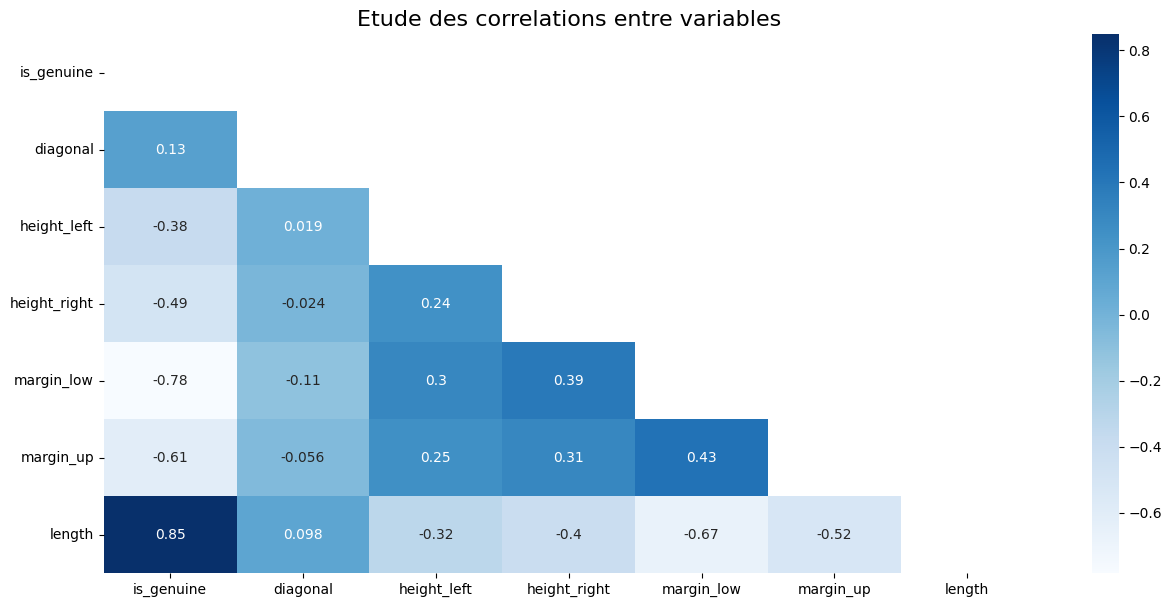

In [7]:
plt.figure(figsize = (15,7))
mask = np.triu(np.ones_like(data.corr(),dtype = bool))
sns.heatmap(data.corr(), mask=mask, annot = True, cmap ="Blues")
plt.title('Etude des correlations entre variables',fontsize = 16)

plt.show()

Observations graphiques.

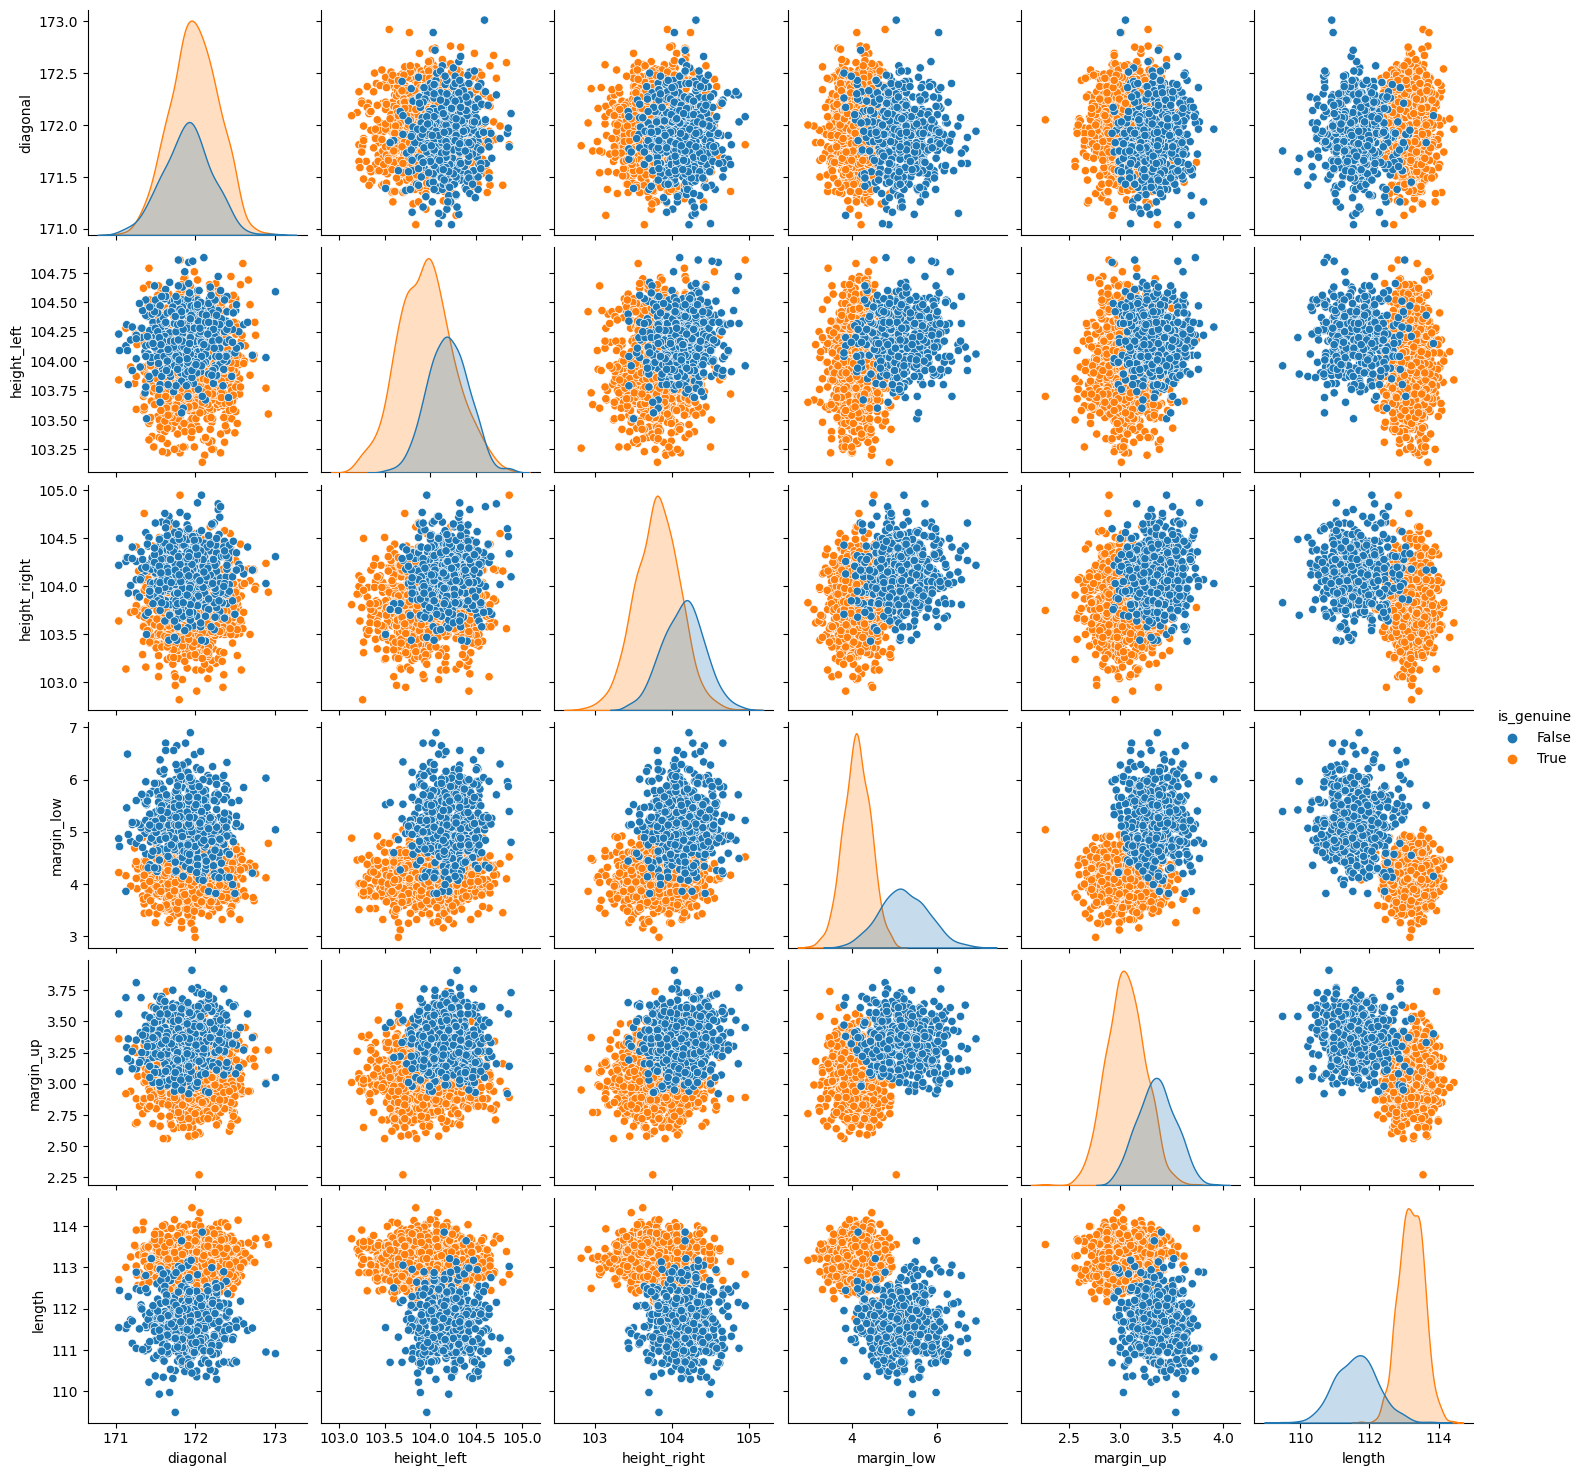

In [8]:
sns.pairplot(data, hue = "is_genuine")

## Création DF 'data_1' ne contenant que les lignes sans variables manquantes

Remplacer les valeurs manquantes par une approximation pourrait fausser l'apprentissage du modèle. Lors de l'entraînement des modèles, nous testerons à chaque fois ce dernier d'abord sur les données non complétées, puis sur les données complétées pour comparer la performance de prédiciton.

In [9]:
data_1 = data.dropna(axis=0)

In [10]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


#Compléter les données via régression linéaire.

In [11]:
import statsmodels.formula.api as smf
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import t, shapiro

## Vérification de la pertinence des variables

In [12]:
temp = data.dropna(axis=0)

In [13]:
temp = temp.drop(columns ='is_genuine')

In [14]:
temp.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54


In [15]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1463 non-null   float64
 1   height_left   1463 non-null   float64
 2   height_right  1463 non-null   float64
 3   margin_low    1463 non-null   float64
 4   margin_up     1463 non-null   float64
 5   length        1463 non-null   float64
dtypes: float64(6)
memory usage: 80.0 KB


In [16]:
reg_multi = smf.ols('margin_low~diagonal+height_left+height_right+margin_up+length', data = temp).fit()

In [17]:
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.60e-202
Time:                        13:49:50   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

L'ensemble des variables sont statistiquement significatives.

## Test des conditions d'application de la régression linéaire


### Test de la colinéarité des variables


In [18]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.013612899068628,
 1.1382605736082476,
 1.2301145155560345,
 1.4044037781843621,
 1.5769501453665853]

Ici, tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.



### Test de l’homoscédasticité


In [19]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 7.7595352162878e-16


La p-valeur ici est inférieure à $5$%, on rejette l'hypothèse $H0$ selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité). Nous allons réaliser une observation graphique des résidus afin de déterminer s'il est tout de même cohérent d'utiliser une régression linéaire.

In [20]:
# nombre d'individus
n = temp.shape[0]
# nombre de variables
p = 5

In [21]:
# création du DataFrame
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})
analyses['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-0.05/2,n-p-1)

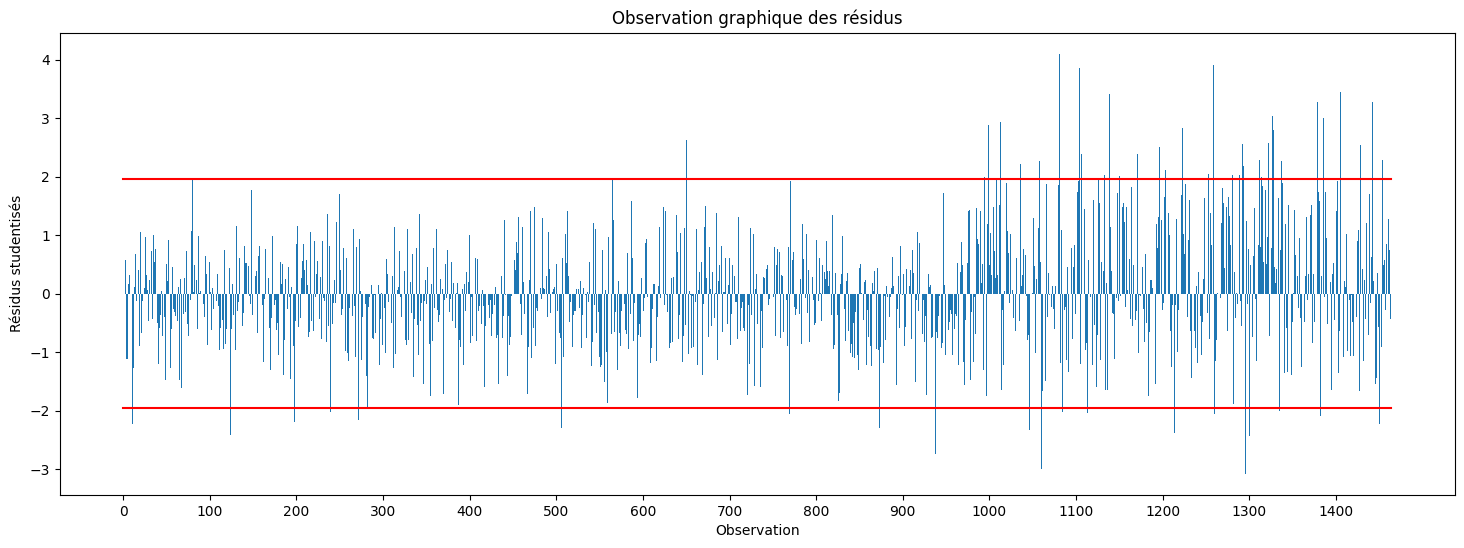

In [22]:
# création du graphique
plt.figure(figsize=(18,6))
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, n+1, step=100))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, n+1], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, n+1], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.title('Observation graphique des résidus')
plt.show()

On constate que peu de résidus studentisés sont supérieurs à l'écart-type empirique. De plus, l'échantillon est suffisamment grand (supérieur à 30) pour considérer qu'il n'est pas aberrant d'utilisier un modèle de régression linéaire malgré l'hétéroscédasticité des résidus.

### Test de la normalité des résidus


In [23]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9857882857322693, pvalue=8.540482210328548e-11)

Ici, l'hypothèse de normalité est validée (p-value < 0.05).



## Optimisation de la régression linéaire

### Preprocessing

In [24]:
# target vector
y = temp["margin_low"].values

In [25]:
# matrice des variables
X = temp.drop(columns =['margin_low']).values

In [26]:
# preprocessing
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
# séparation des données train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Régression linéaire non optimisée pour servir de base de comparaison

In [28]:
# Regression linéaire
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.4604807117736819

In [29]:
model.score(X_test, y_test)

0.5457956683532407

In [30]:
# Erreur quadratique moyenne
baseline_error = np.mean((model.predict(X_test) - y_test)**2)
print(baseline_error)

0.19144954947493334


### ElasticNetCV

#### Test avec toutes les variables

In [31]:
opti = ElasticNetCV(l1_ratio= np.arange(0.05,1,0.05),alphas=np.logspace(-10,10,100), cv=5, random_state = 42)
opti.fit(X_train, y_train)

ElasticNetCV(alphas=array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.02353102e-09, 1.62975083e-09, 2.59502421e-09,
       4.13201240e-09, 6.57933225e-09, 1.04761575e-08, 1.66810054e-08,
       2.65608778e-08, 4.22924287e-08, 6.73415066e-08, 1.07226722e-07,
       1.70735265e-07, 2.71858824e-07, 4.32876128e-07, 6.89261210e-07,
       1.09749877e-06, 1.747528...
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
             cv=5,
             l1_ratio=array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
             random_state=42)

In [32]:
y_pred = opti.predict(X_test)

In [33]:
opti.score(X_train, y_train)

0.4604416842845873

In [34]:
opti.score(X_test, y_test)

0.5448599288462562

In [35]:
baseline_error = np.mean((opti.predict(X_test) - y_test)**2)
baseline_error

0.1918439686703394

La qualité des prévisions sont identiques entre un modèle de récession linéraire simple et un modèle ElasticNet optimisé.

## Imputation des valeurs

Les modèles et le nombre de variables utilisées n'ont pas ici d'influence sur la qualité des prévisions, la variance expliquée reste de 54%.

In [36]:
# création du DF à compléter
temp = data.loc[data['margin_low'].isna(),:]

In [37]:
# séparation des données d'aprentissage et du target vector
y = temp['margin_low']
X = temp.drop(columns =['margin_low', 'is_genuine'])

In [38]:
# preprocessing
X = scaler.transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RobustScaler was fitted without feature names
  warnings.warn(


In [39]:
# application du modèle de régression linéaire
y_pred = model.predict(X)

In [40]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 37 entries, 72 to 1438
Series name: margin_low
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 592.0 bytes


In [41]:
# imputation des données
temp['margin_low'] = y_pred

<ipython-input-41-b00c5cff3ee2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['margin_low'] = y_pred


Text(0.5, 1.0, 'Visualisation des résultats prédits')

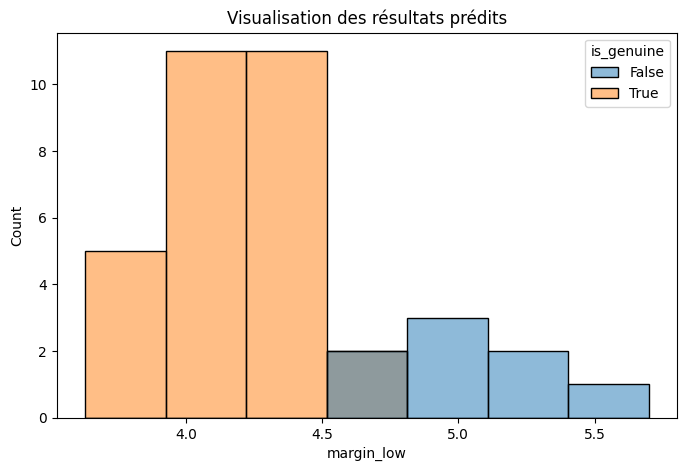

In [42]:
# Visualisation graphique des valeurs prédites
plt.figure(figsize =(8,5))
sns.histplot(data = temp, x='margin_low', hue = 'is_genuine')
plt.title('Visualisation des résultats prédits')

In [43]:
temp.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.323133,3.25,112.79
99,True,171.93,104.07,104.18,4.393907,3.14,113.08
151,True,172.07,103.80,104.38,4.416845,3.02,112.93
197,True,171.45,103.66,103.80,4.337374,3.62,113.27
241,True,171.83,104.14,104.06,4.634614,3.02,112.36


In [44]:
# création du DF avec les données imputées
data_2 = data
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [45]:
# mise à jour du DF
data_2.update(temp)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   object 
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: float64(6), object(1)
memory usage: 82.2+ KB


In [46]:
# changement de type de donnée 'is_genuine'
data_2['is_genuine'] = data_2['is_genuine'].astype(bool)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


# Recherche du meilleur modèle

Avant de tester et d'améliorer différents algorithmes, il convient de définir les critères que nous recherchons dans pour cet algorithme.

Eléments à prendre en compte:

- Nous sommes dans un sytème de monnaie fiduciaire. La valeur intrinsèque d'un billet n'a aucun lien avec sa valeur monétaire. La valeur d'un billet repose donc sur la confiance des acteurs économiques en sa valeur.

- Les espèces représentent un poids relativement faible sur la masse monétaire totale (par rapport à la monnaie scripturale ex: comptes bancaires, investissements sur les marchés financiers...)

Par conséquent:

Prédire qu'un billet est faux alors qu'il s'agit d'un vrai billet:

- n'a pas de conséquences sur la stabilité du sytème financier;
n'entraine pas de dépenses importantes.

Prédire qu'un billet est vrai alors qu'il est faux:

- peut diminuer la confiance des acteurs économiques dans la valeur de la monnaie.

- permet le financement d'organisations criminelles.

Conclusion: Entre deux algorithmes aux performances équivalentes il conviendra de sélectionner celui dont le taux de faux positifs est le plus bas.

Les tests seront réalisés à la fois sur 'data_1' où les données manquantes ont été supprimées et 'data_2' où les données manquantes ont été imputées.

## Séparation train/test et preprocessing

## Création de la fonction "scoring" destinée à évaluer la performance des modèles 

In [47]:
# scoring modèles supervisés
def scoring(y_test, y_pred):
  conf = confusion_matrix(y_test, y_pred)
  FP = conf[0,1]
  FN = conf[1,0]
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  return FP, FN, precision, recall

In [48]:
# scoring modèles non-supervisés
def scoring_KMeans(y_test, y_pred):
  conf = confusion_matrix(y_test, y_pred)
  df = pd.DataFrame(conf, columns= ['Negatif_pred','Positif_pred'], index = ['Negatif_réel', 'Positif_réel'])
  display(df)
  precision = precision_score(y_test, y_pred)
  precision_2 = df.iloc[1,0] / (df.iloc[1,0] + df.iloc[0,0])
  print('Précision = {:.4f}'.format(precision))
  print('précision_2 = {:.4f}'.format(precision_2))
  recall = recall_score(y_test, y_pred)
  recall_2 = df.iloc[0,1] / (df.iloc[0,1] + df.iloc[1,1])
  print('Rappel = {:.4f}'.format(recall))
  print('rappel_2 = {:.4f}'.format(recall_2))

## Preprocessing et test de modèles non-supervisés.

Nous allons ici réaliser le preprocessing des données complétées et non-complétées. Nous réaliserons ensuite une segmentation via K-means qui nous permettrons d'établir une base de comparaison pour évaluer nos modèles supervisés.

### Preprocessing et séparation train et test set pour les données non complétées 

In [49]:
y= data_1['is_genuine']
X = data_1.drop(columns=('is_genuine'), axis=1)
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state= 42, stratify= y)

####  Test KMeans

In [50]:
model = KMeans(n_clusters = 2, n_init = 10)
model.fit(X_train)

KMeans(n_clusters=2, n_init=10)

In [51]:
y_pred = model.predict(X_test)

In [52]:
scoring_KMeans(y_test, y_pred)

,Negatif_pred,Positif_pred
Negatif_réel,5,94
Positif_réel,193,1


Précision = 0.0105
précision_2 = 0.9747
Rappel = 0.0052
rappel_2 = 0.9895


### Preprocessing et séparation train et test set, pour le DF avec données imputées

In [53]:
y_2= data_2['is_genuine']
X_2 = data_2.drop(columns=('is_genuine'), axis=1)
scaler = RobustScaler()
X_scaled_2 = scaler.fit_transform(X_2)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, y_2, test_size = 0.2, random_state= 0, stratify= y_2)

#### Test KMeans données complétées

In [54]:
model = KMeans(n_clusters = 2, n_init = 10)
model.fit(X_train_2)

KMeans(n_clusters=2, n_init=10)

In [55]:
y_pred = model.predict(X_test_2)


In [56]:
scoring_KMeans(y_test_2, y_pred)

,Negatif_pred,Positif_pred
Negatif_réel,5,95
Positif_réel,199,1


Précision = 0.0104
précision_2 = 0.9755
Rappel = 0.0050
rappel_2 = 0.9896


## Test de différents algorithmes

In [57]:
# nommage des DF
data_1.name = 'Data_1'
data_2.name = 'Data_2'

In [58]:
import warnings
warnings.filterwarnings('ignore')

# DF à tester
liste = [data_1, data_2]

# liste des models à tester
algo_test = [LogisticRegression(solver='liblinear'),LinearSVC(), KNeighborsClassifier()]
# liste des paramètres à tester
algo_opti = {LogisticRegression():{"solver": ['liblinear', 'lbfgs', 'newton-cholesky'],
          'penalty': ['l1','l2','elasticnet']},
          LinearSVC():{"loss": ['hinge', 'squared_hinge'],
          'penalty': ['l1','l2'],"dual":[True,False]}, 
          KNeighborsClassifier():{"n_neighbors": np.arange(1,20),
          'weights': ['uniform','distance']}}


# création du DF de stockage des modèles et des informations relatives
eval = pd.DataFrame(columns = ['Algorithme','Model','Nb_faux_positif','Nb_faux_negatifs','Précision','Rappel'])


for i in liste:
  # preprocessing
  y = i['is_genuine']
  X = i.drop(columns=('is_genuine'), axis=1)
  scaler = RobustScaler()
  X_scaled = scaler.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state= 42, stratify= y)

  # test des algorithmes sur le jeu de données non complétées
  for model in algo_test:
    # nom du model
    name = str(model)+ i.name
    # entrainement et prédiction
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # scoring
    info = list(scoring(y_test, y_pred))
    # sauvegarde du model
    info.insert(0,model)
    info.insert(0,name)
    # export vers le DF
    eval.loc[len(eval)] = info
   

  for algo, params in algo_opti.items():
    # nom du model
    name = str(algo)+ '_opti_'+i.name
    # recherche des meilleurs paramètres
    grid = GridSearchCV(algo,params, cv=5, scoring = 'precision')
    grid.fit(X_train, y_train)
    # entrainement et prédiction
    model = grid.best_estimator_
    y_pred = model.predict(X_test)
    # scoring
    info = list(scoring(y_test, y_pred))
    # sauvegarde du model
    info.insert(0,model)
    info.insert(0,name)
    # export vers le DF
    eval.loc[len(eval)] = info
    
  


In [59]:
# Comparaison des modèles
eval.sort_values('Précision', ascending =False)

,Algorithme,Model,Nb_faux_positif,Nb_faux_negatifs,Précision,Rappel
6,LogisticRegression(solver='liblinear')Data_2,LogisticRegression(solver='liblinear'),2,1,0.993355,0.996667
9,LogisticRegression()_opti_Data_2,LogisticRegression(solver='liblinear'),2,1,0.993355,0.996667
7,LinearSVC()Data_2,LinearSVC(),3,2,0.990033,0.993333
10,LinearSVC()_opti_Data_2,LinearSVC(loss='hinge'),3,2,0.990033,0.993333
1,LinearSVC()Data_1,LinearSVC(),3,1,0.989761,0.996564
4,LinearSVC()_opti_Data_1,LinearSVC(),3,1,0.989761,0.996564
0,LogisticRegression(solver='liblinear')Data_1,LogisticRegression(solver='liblinear'),3,2,0.989726,0.993127
8,KNeighborsClassifier()Data_2,KNeighborsClassifier(),4,3,0.986711,0.990000
11,KNeighborsClassifier()_opti_Data_2,KNeighborsClassifier(n_neighbors=4),4,4,0.986667,0.986667
3,LogisticRegression()_opti_Data_1,"LogisticRegression(penalty='l1', solver='libli...",4,1,0.986395,0.996564


Obeservation de la significativité des variables dans les regression logistics:

In [60]:
reg_log2 = smf.glm('is_genuine~diagonal+height_left+height_right+margin_low+margin_up+length',
                   data=data_2, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1500
Model:                                                   GLM   Df Residuals:                     1493
Model Family:                                       Binomial   Df Model:                            6
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -42.327
Date:                                       Tue, 02 May 2023   Deviance:                       84.654
Time:                                               13:50:01   Pearson chi2:                 2.68e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7038
Covariance Type:                                   nonrobust                      

Suppression de la variable 'diagonale':

In [61]:
reg_log2 = smf.glm('is_genuine~height_left+height_right+margin_low+margin_up+length',
                   data=data_1, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                 1463
Model:                                                   GLM   Df Residuals:                     1457
Model Family:                                       Binomial   Df Model:                            5
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -39.218
Date:                                       Tue, 02 May 2023   Deviance:                       78.437
Time:                                               13:50:01   Pearson chi2:                 2.57e+03
No. Iterations:                                           10   Pseudo R-squ. (CS):             0.7058
Covariance Type:                                   nonrobust                      

Observation des courbes d'apprentissage:

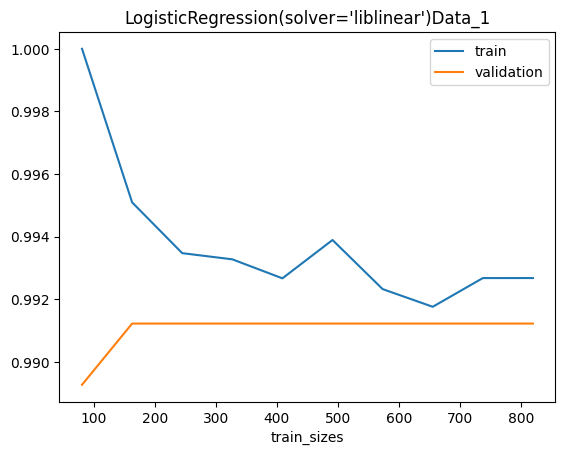

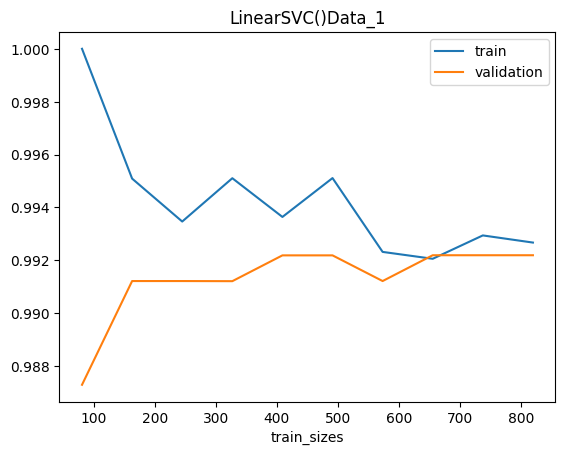

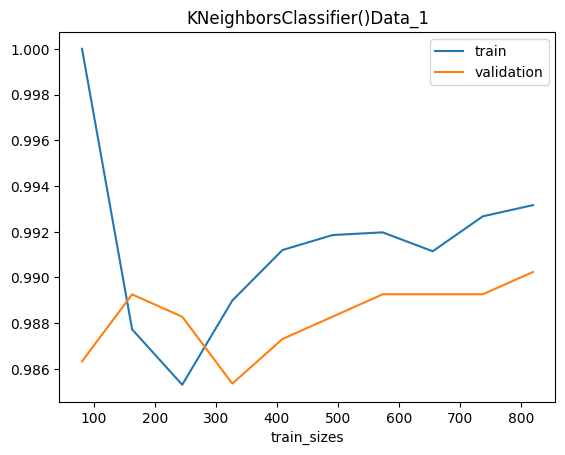

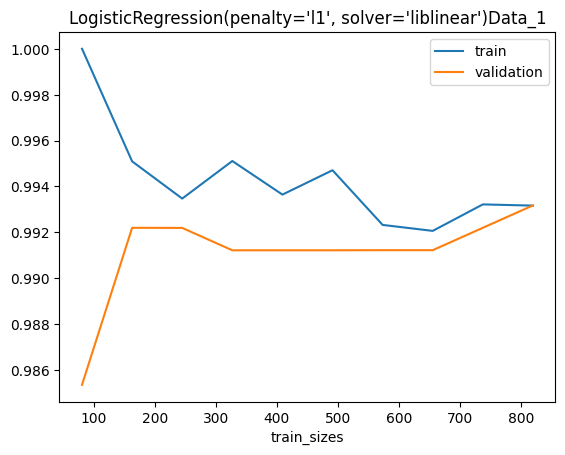

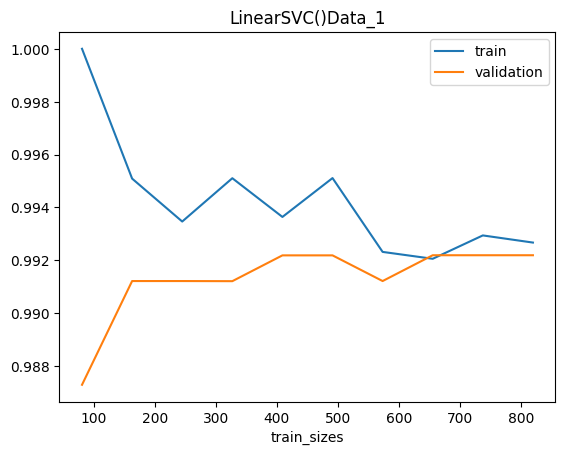

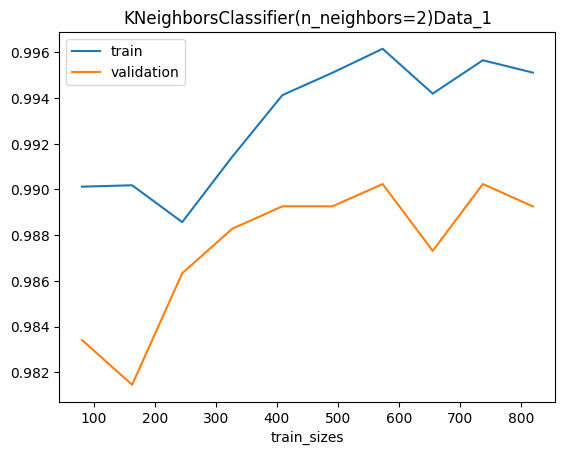

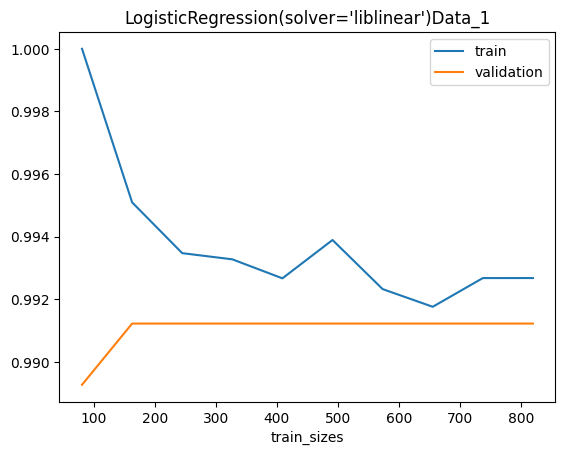

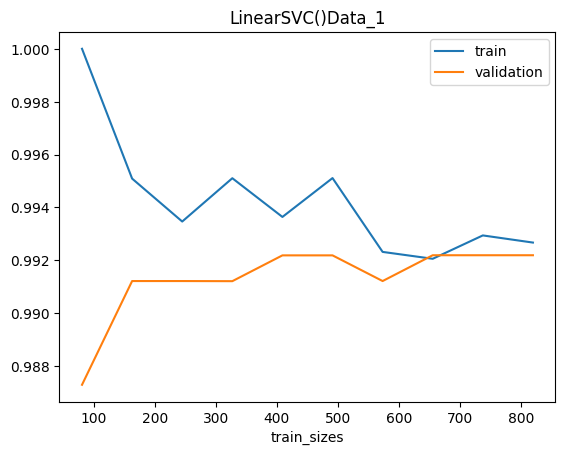

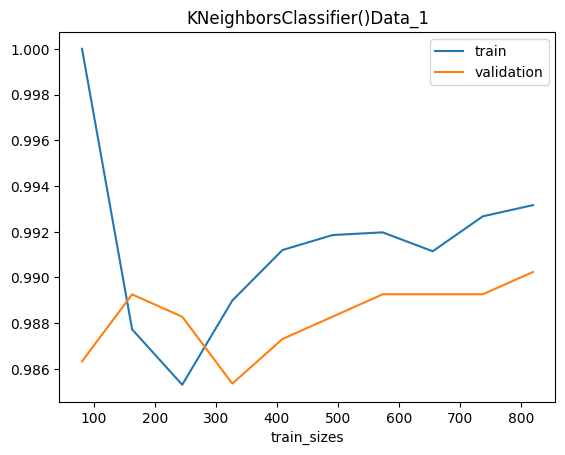

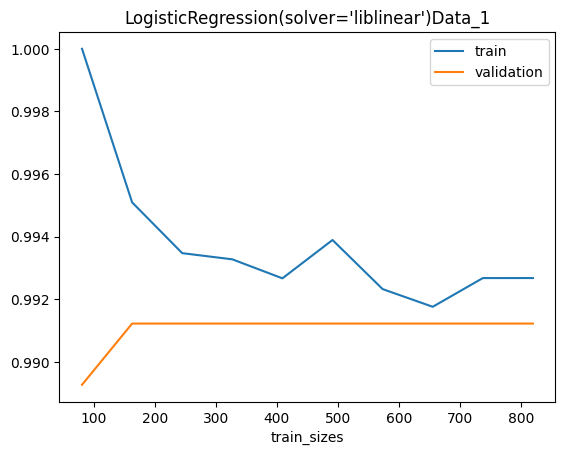

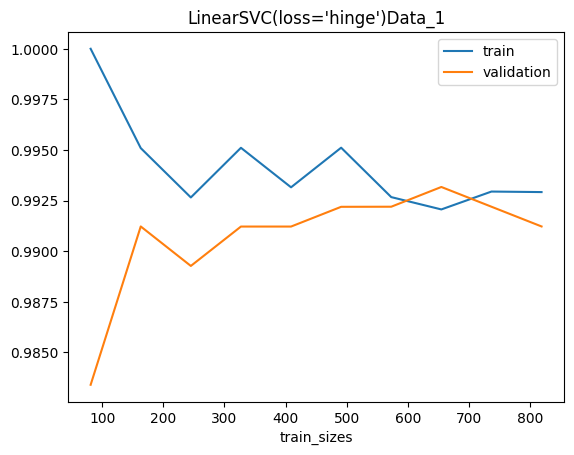

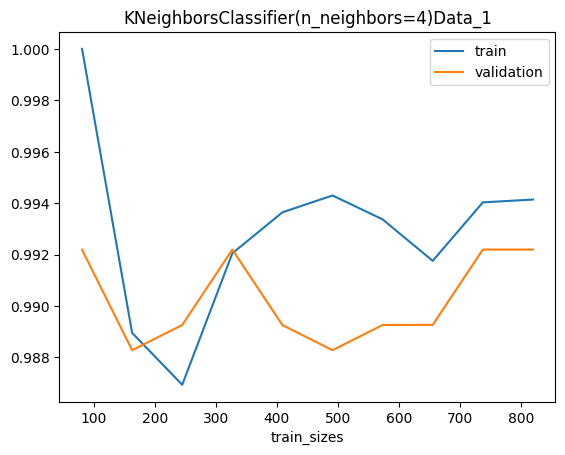

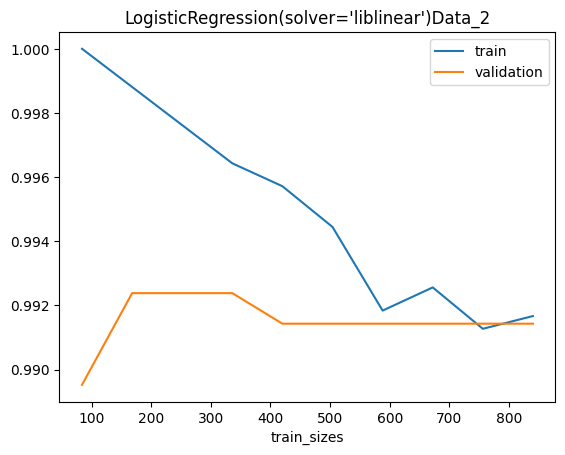

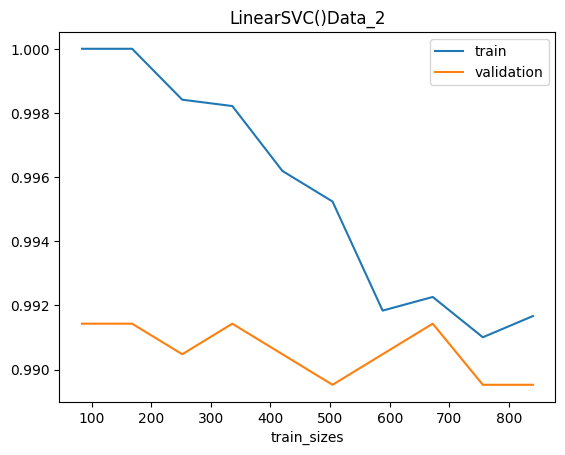

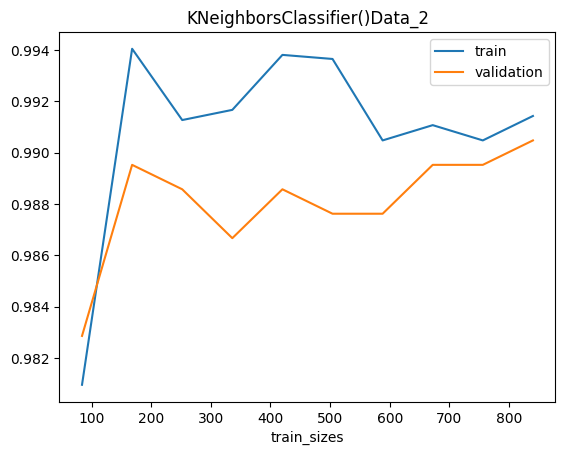

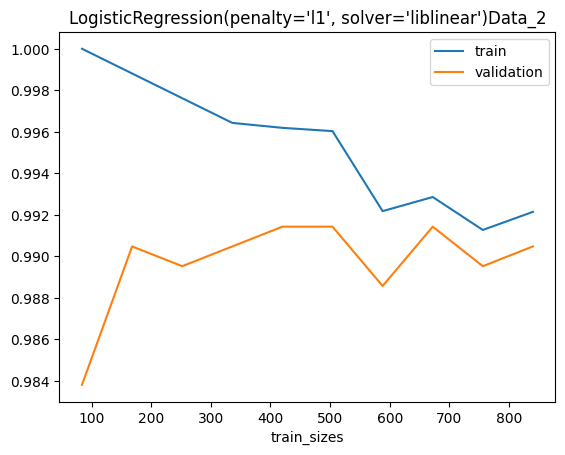

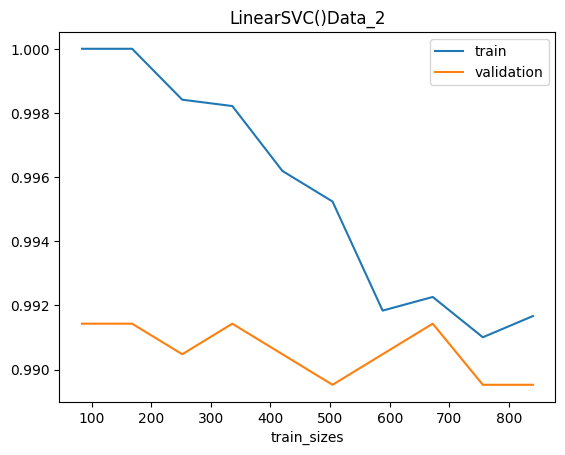

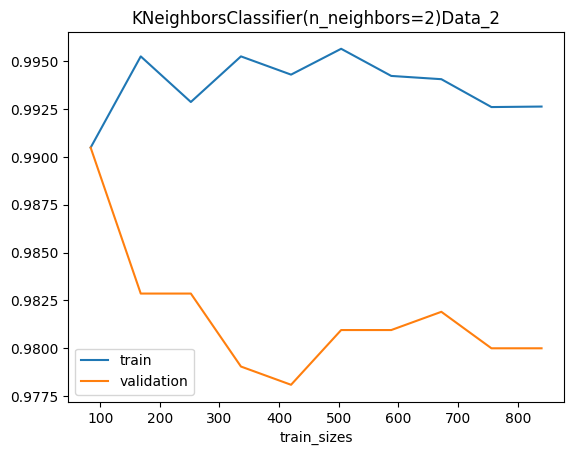

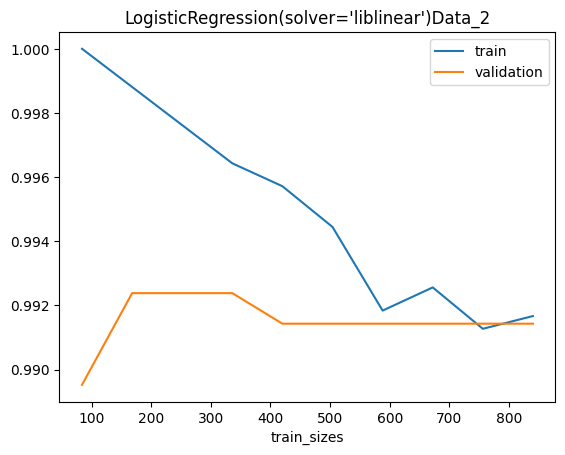

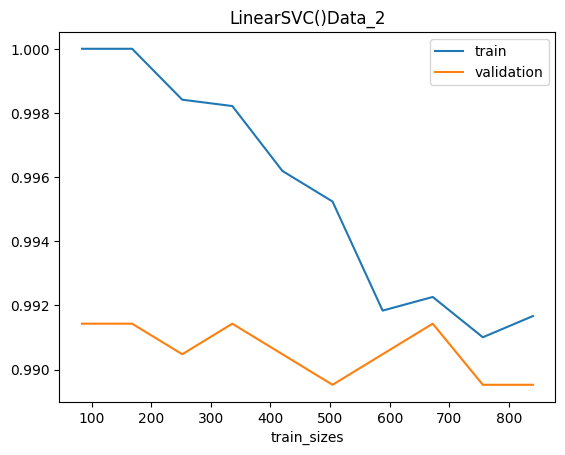

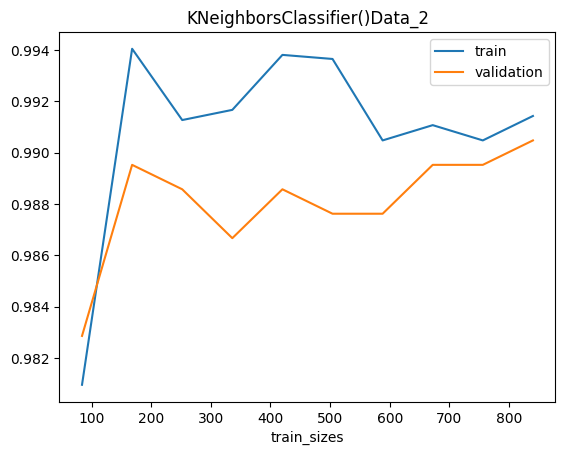

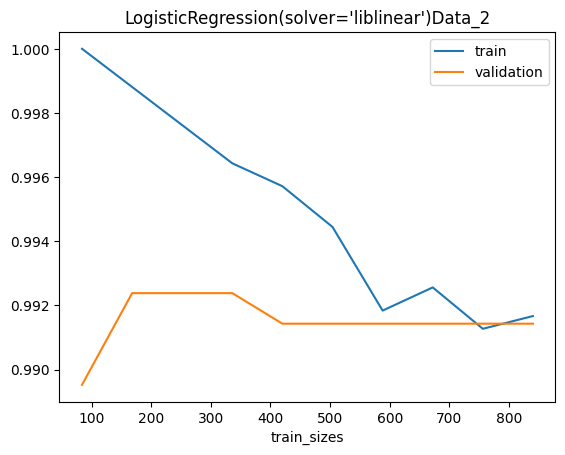

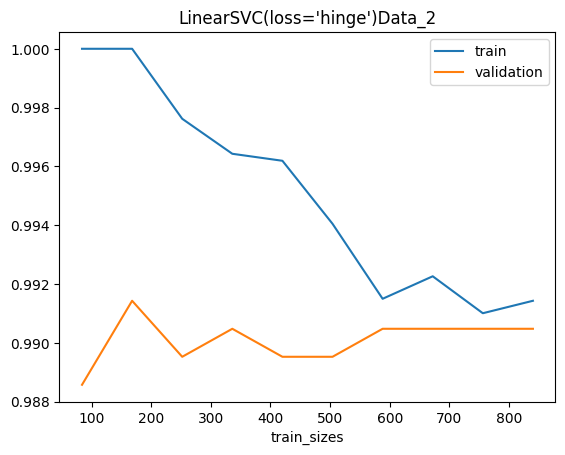

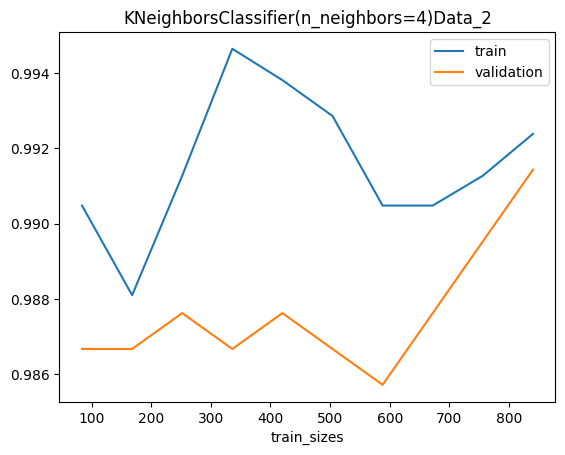

In [62]:
from sklearn.model_selection import learning_curve
nb_graph = len(eval['Model'])
for i in liste:
  # preprocessing
  y = i['is_genuine']
  X = i.drop(columns=('is_genuine'), axis=1)
  scaler = RobustScaler()
  X_scaled = scaler.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state= 42, stratify= y)
  for a in eval['Model']:
    N, train_score, val_score = learning_curve(a, X_train, y_train, 
                                            train_sizes = np.linspace(0.1,1,10),cv=5)
    
    title = str(a) + i.name
    plt.plot(N, train_score.mean(axis=1), label ='train')
    plt.plot(N, val_score.mean(axis =1), label = 'validation')
    plt.xlabel('train_sizes')
    plt.title(title)
    plt.legend()
    plt.show()
    

En observant les courbes d'apprentissage on constate que les modèles SVC et LinearRegression ont atteint un plateau, mais ce n'est pas le cas pour les KNN. Si le coût de collecte des données le permet, il serait pertinent d'augmenter le nombre d'échantillons car les modèles KNN ont encore un potentiel de progression.

## Récupération du model sélectionné

In [63]:
model_final = eval.iloc[6,1]

In [64]:
y_pred = model_final.predict(X_test)

In [65]:
confusion_matrix(y_test, y_pred)

array([[148,   2],
       [  1, 299]])

# Utilisation du modèle pour réaliser les prédictions

In [66]:
test = pd.read_csv('/content/drive/MyDrive/Cours/Projet 10/Fichier test/billets_test (1).csv')

In [67]:
test.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [68]:
# Preprocessing
y = test['id']
X = test.drop(columns = ['id'], axis = 1)
X_scaled = scaler.transform(X)

In [69]:
# Predictions
y_pred = model_final.predict(X_scaled)

In [70]:
test['resultats'] = y_pred

In [71]:
# affichage du résultat
test

,diagonal,height_left,height_right,margin_low,margin_up,length,id,resultats
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1,True
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2,False
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3,True
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4,False
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5,False
